# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- Nama: Muhammad Amien Ramdhani
- Email: dhanimacbull@gmail.com
- Id Dicoding: amienramdhani

# Persiapan
## Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import joblib
import os
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Menyiapkan data yang digunakan

In [2]:
df = pd.read_csv("data.csv", delimiter=';')
df.head(10)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# Data Understanding

In [3]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


### Memisahkan data kategorikal dan numerikal

In [6]:
new_df = df.copy()
numerical_column = [
    "Previous_qualification_grade",
    "Admission_grade",
    "Age_at_enrollment",
    "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations",
    "Unemployment_rate",
    "Inflation_rate",
    "GDP",
]

for col in numerical_column:
  new_df[col] = new_df[col].astype("float64")


new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
categorical_columns = [
      "Marital_status",
      "Application_mode",
      "Application_order",
      "Course",
      "Daytime_evening_attendance",
      "Previous_qualification",
      "Nacionality",
      "Mothers_qualification",
      "Fathers_qualification",
      "Mothers_occupation",
      "Fathers_occupation",
      "Displaced",
      "Educational_special_needs",
      "Debtor",
      "Tuition_fees_up_to_date",
      "Gender",
      "Scholarship_holder",
      "International",
      "Status",
]

for col in categorical_columns:
    print(new_df[col].value_counts())

new_df.info()

Marital_status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application_mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Application_order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime_evening_attendance
1    3941
0     483
Name: count, dtype: int64
Previous_qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, d

In [8]:
new_df[categorical_columns].isna().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0
Mothers_occupation,0


In [9]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


## Exploratory Data Analysis

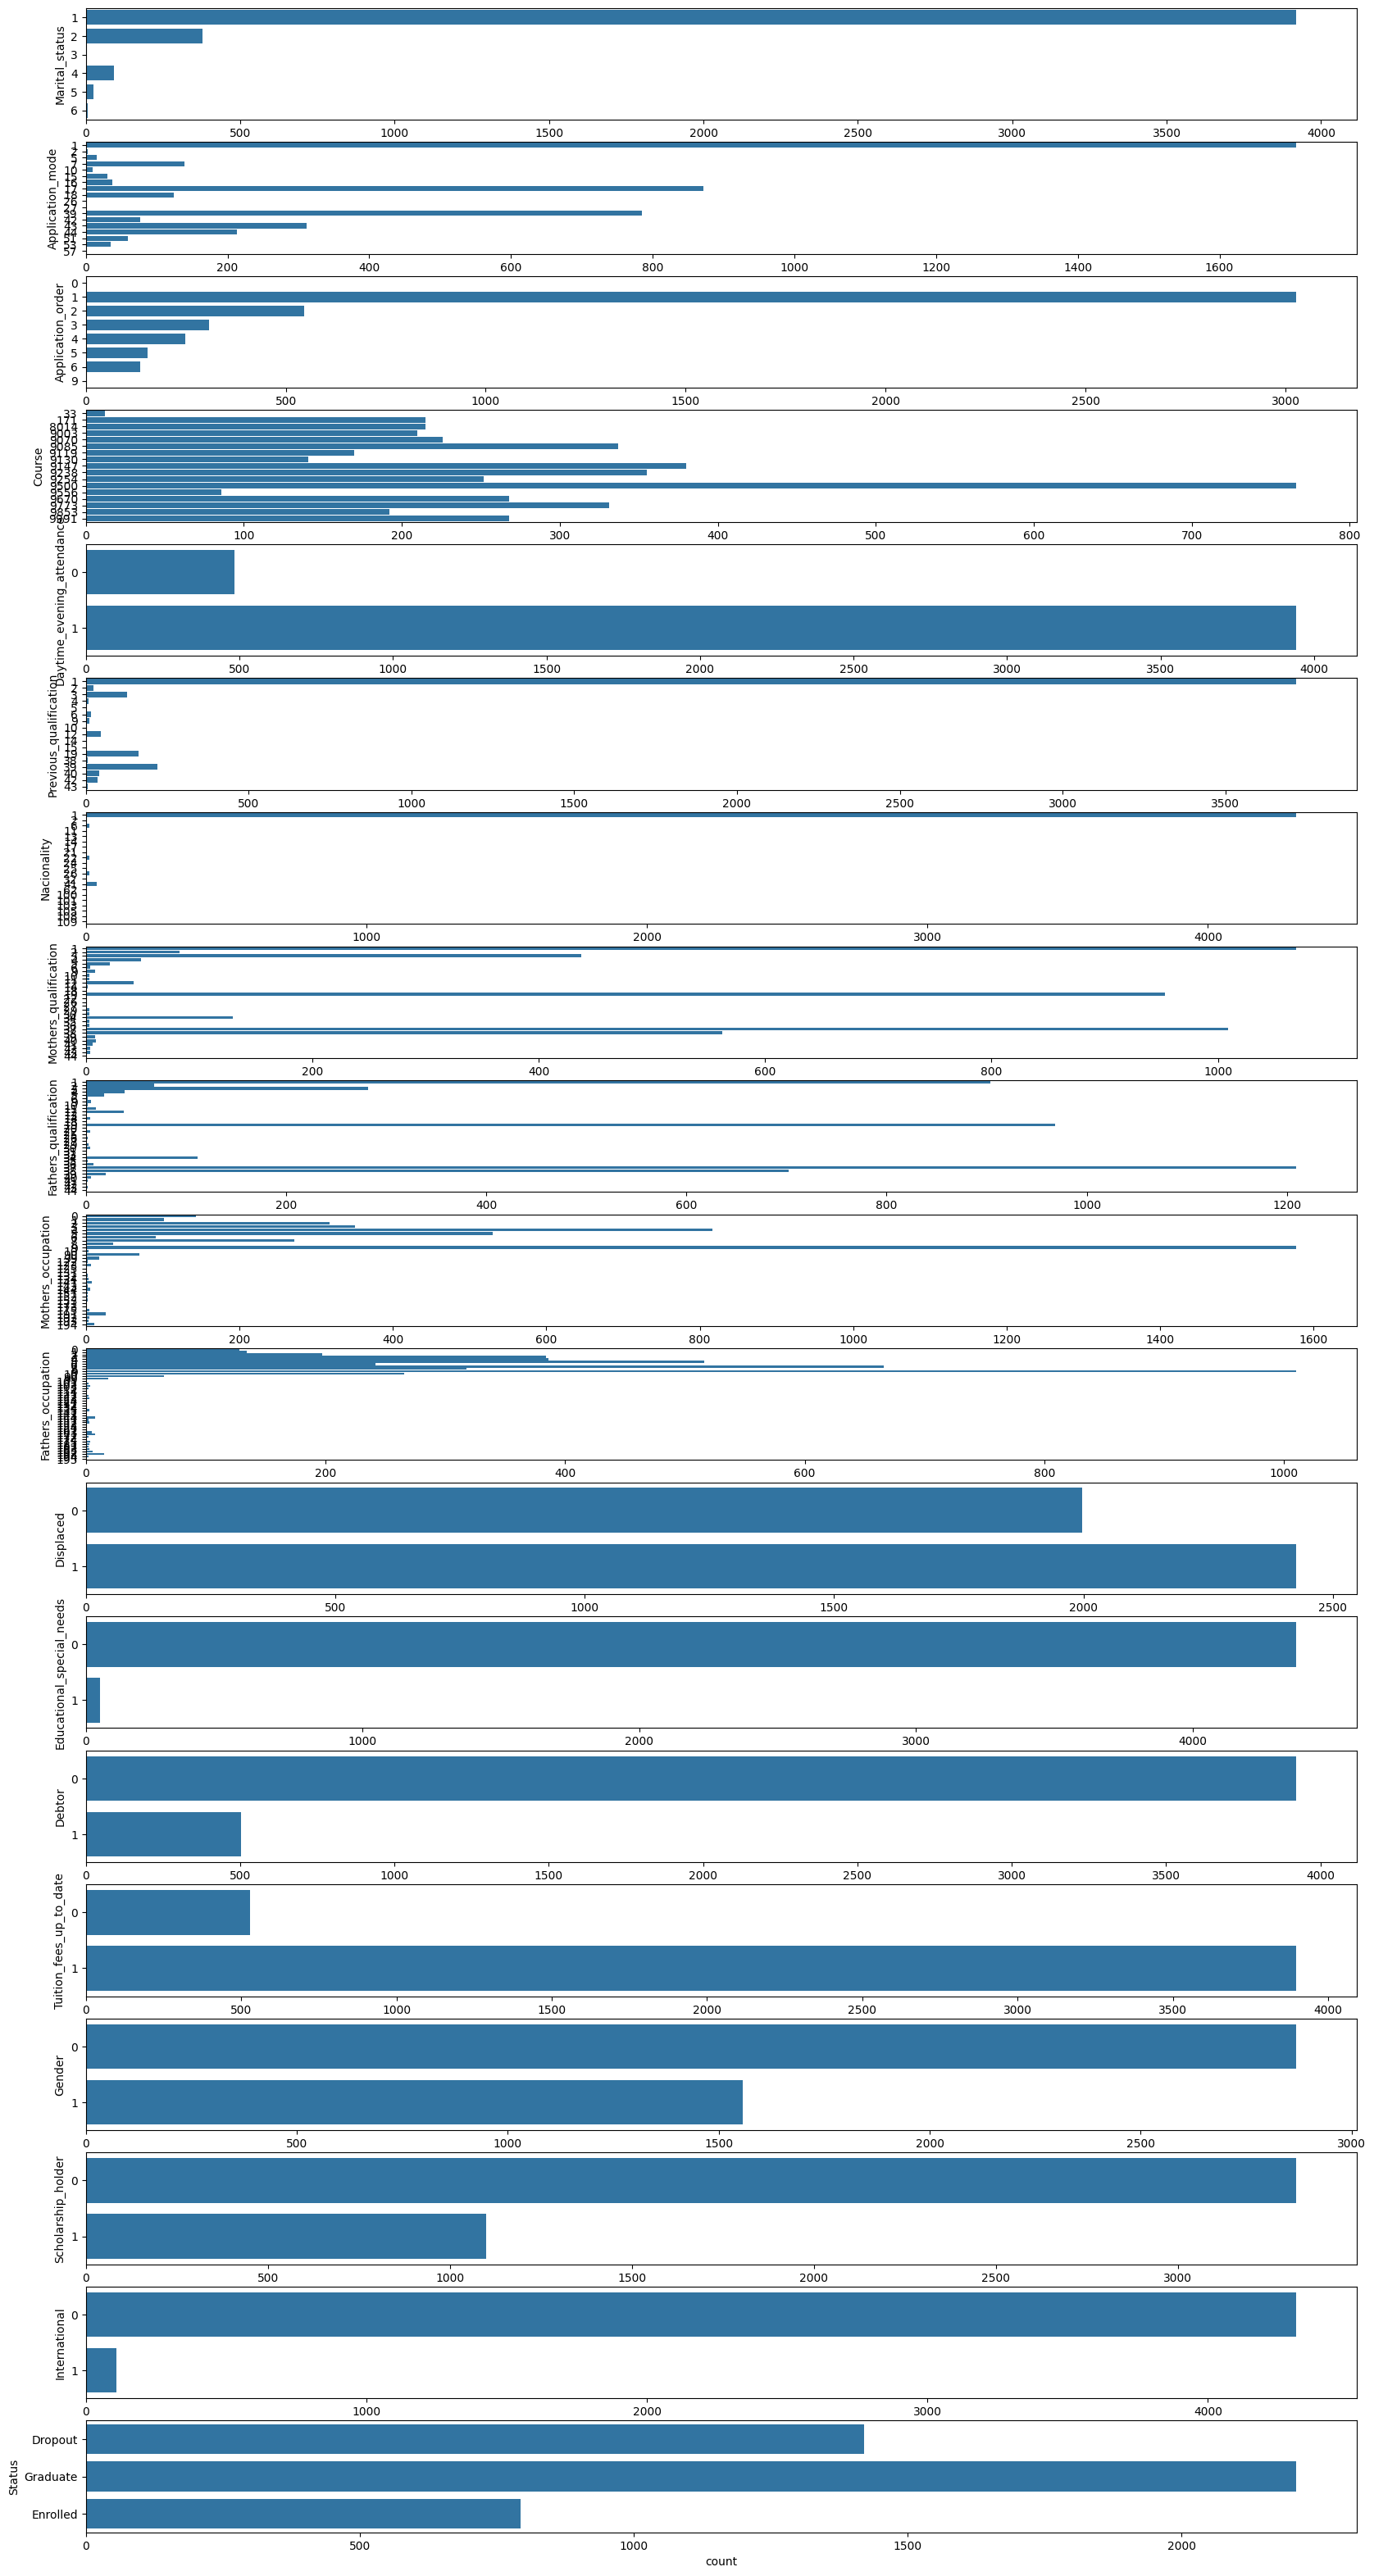

In [10]:
categorical_columns = [
      "Marital_status",
      "Application_mode",
      "Application_order",
      "Course",
      "Daytime_evening_attendance",
      "Previous_qualification",
      "Nacionality",
      "Mothers_qualification",
      "Fathers_qualification",
      "Mothers_occupation",
      "Fathers_occupation",
      "Displaced",
      "Educational_special_needs",
      "Debtor",
      "Tuition_fees_up_to_date",
      "Gender",
      "Scholarship_holder",
      "International",
      "Status",
]

fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(20,40))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i])
plt.show()

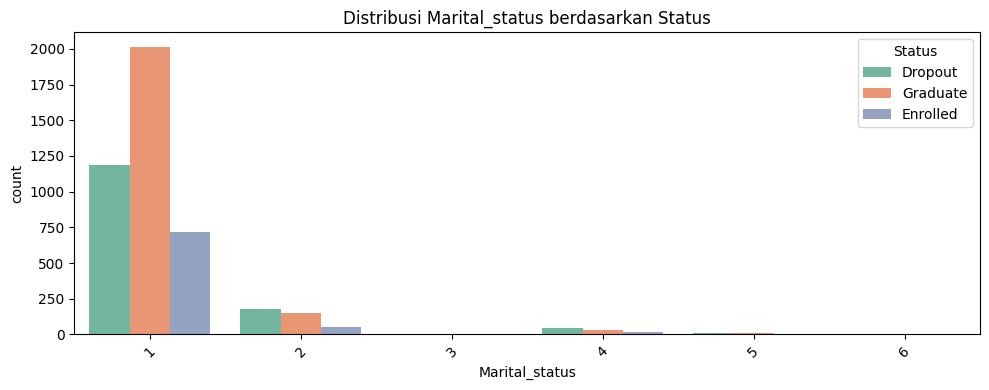

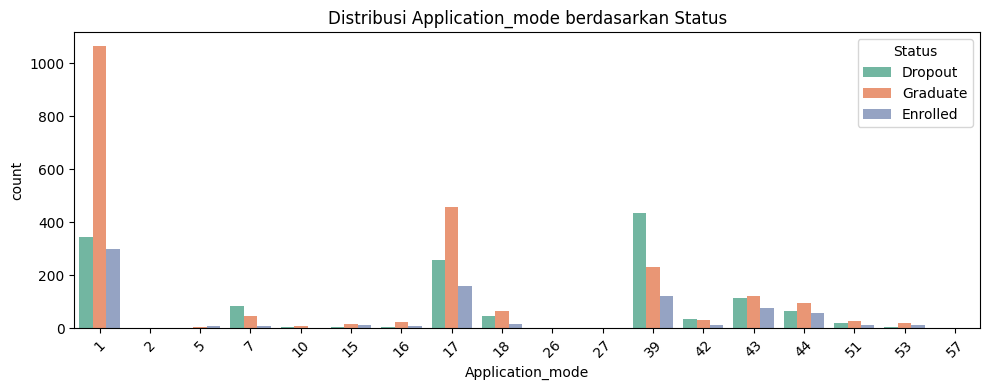

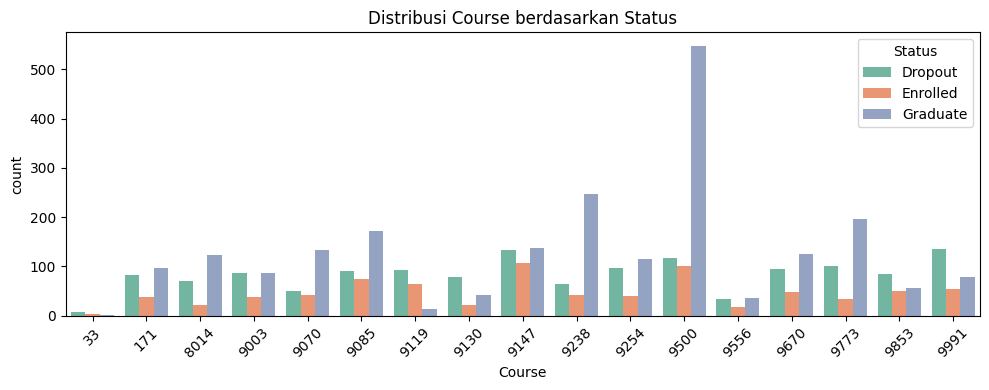

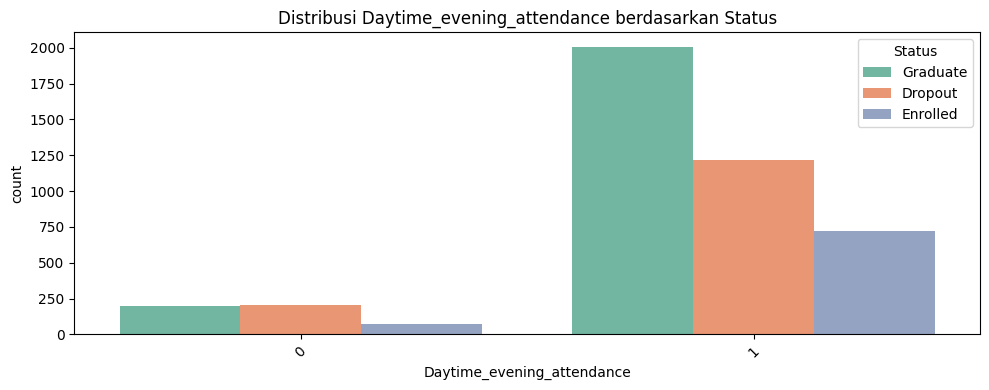

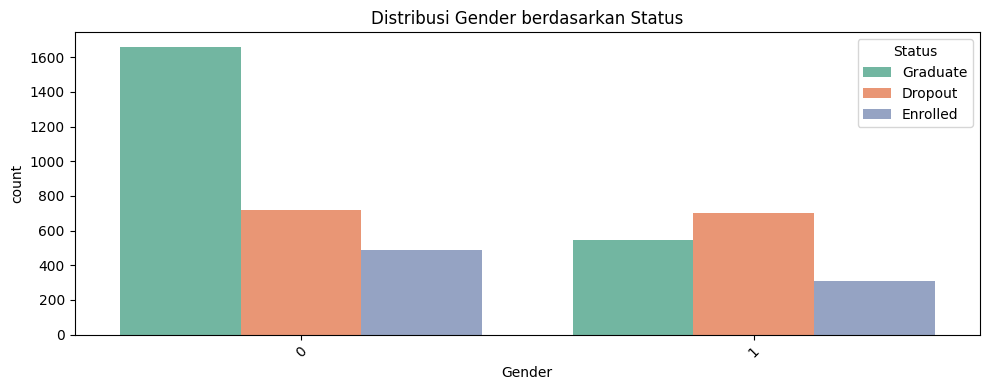

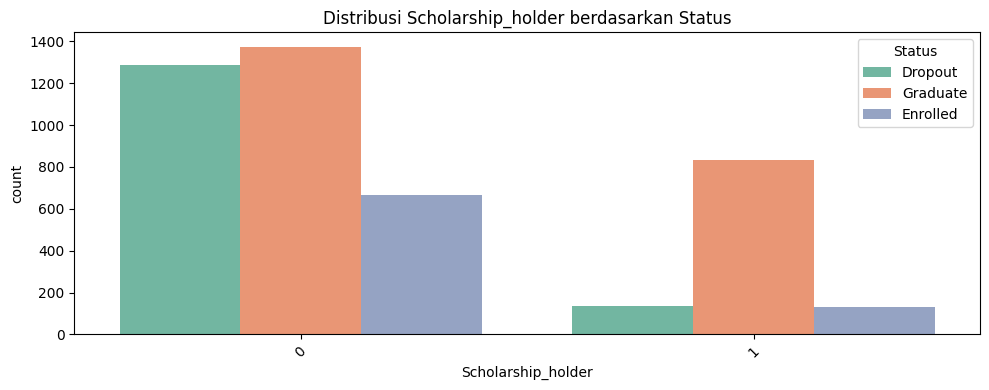

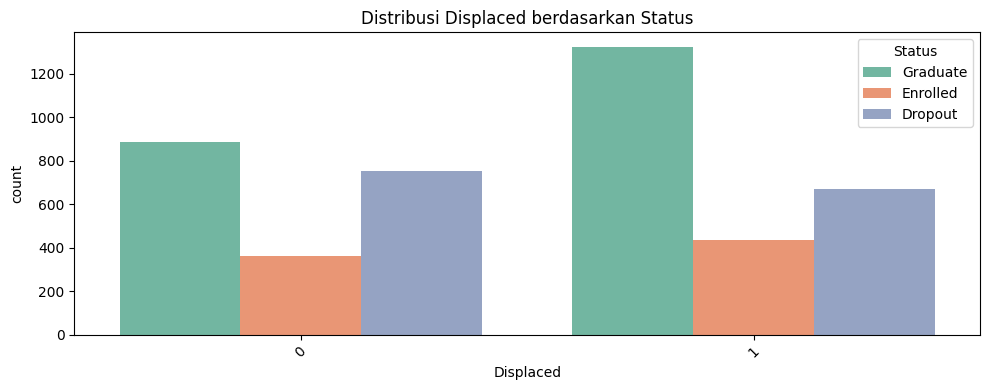

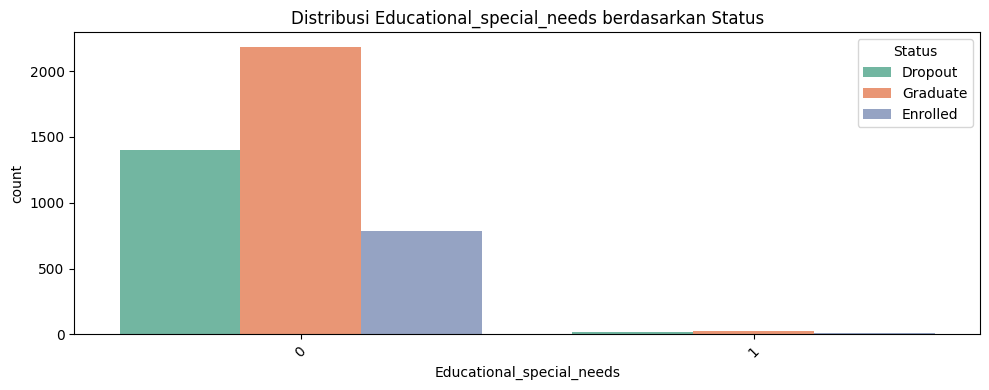

In [11]:
# Visualisasi Kategorikal
categorical_features = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
                        'Gender', 'Scholarship_holder', 'Displaced', 'Educational_special_needs']

for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='Status', palette='Set2')
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<ipython-input-12-6d09618573e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, palette='Set3')


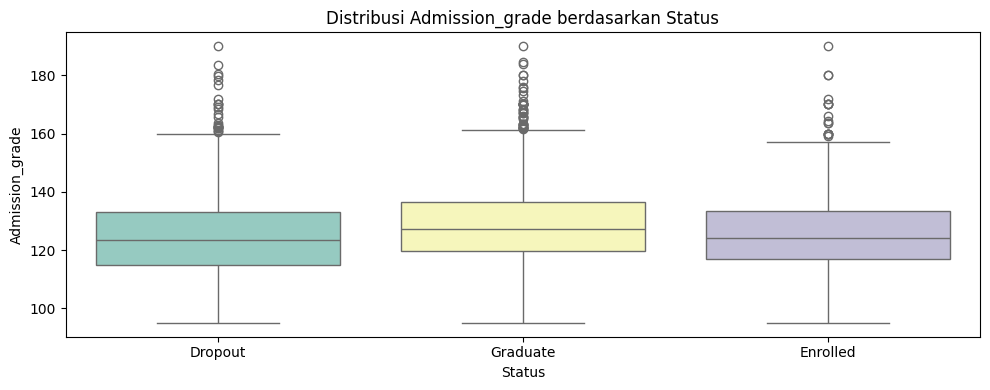

<ipython-input-12-6d09618573e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, palette='Set3')


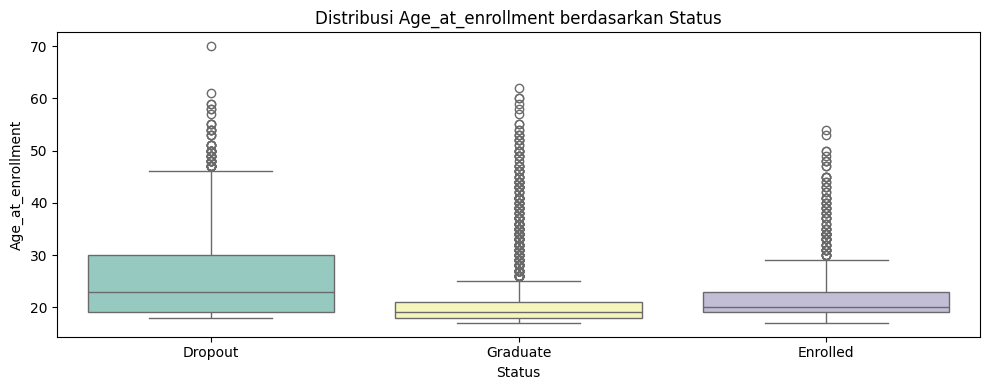

<ipython-input-12-6d09618573e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, palette='Set3')


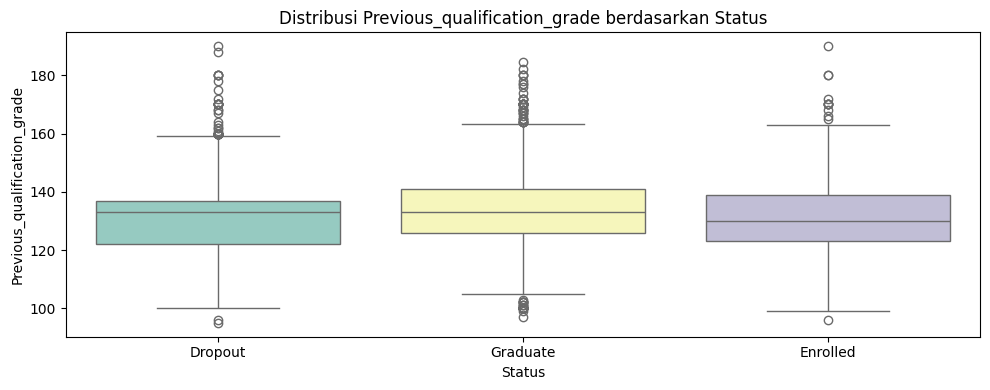

<ipython-input-12-6d09618573e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, palette='Set3')


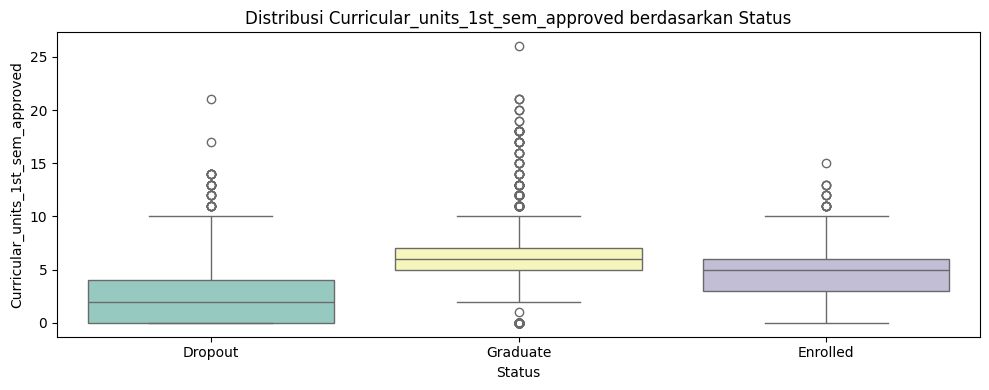

<ipython-input-12-6d09618573e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Status', y=col, palette='Set3')


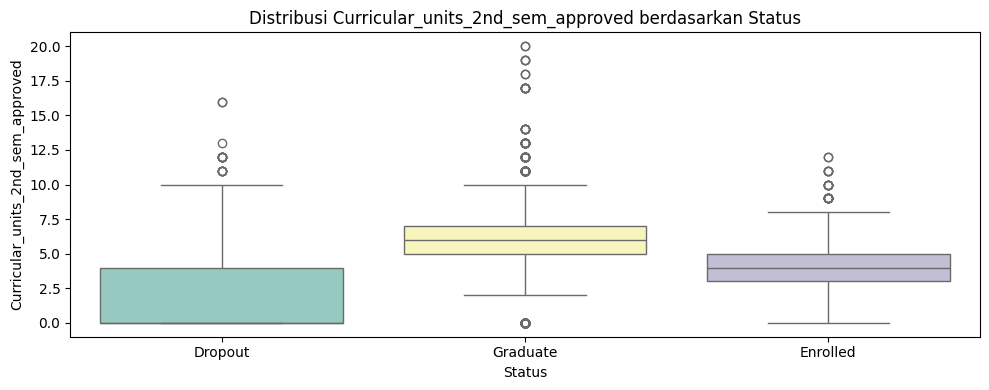

In [12]:
numerical_features = ['Admission_grade', 'Age_at_enrollment', 'Previous_qualification_grade',
                      'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved']

for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x='Status', y=col, palette='Set3')
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.tight_layout()
    plt.show()

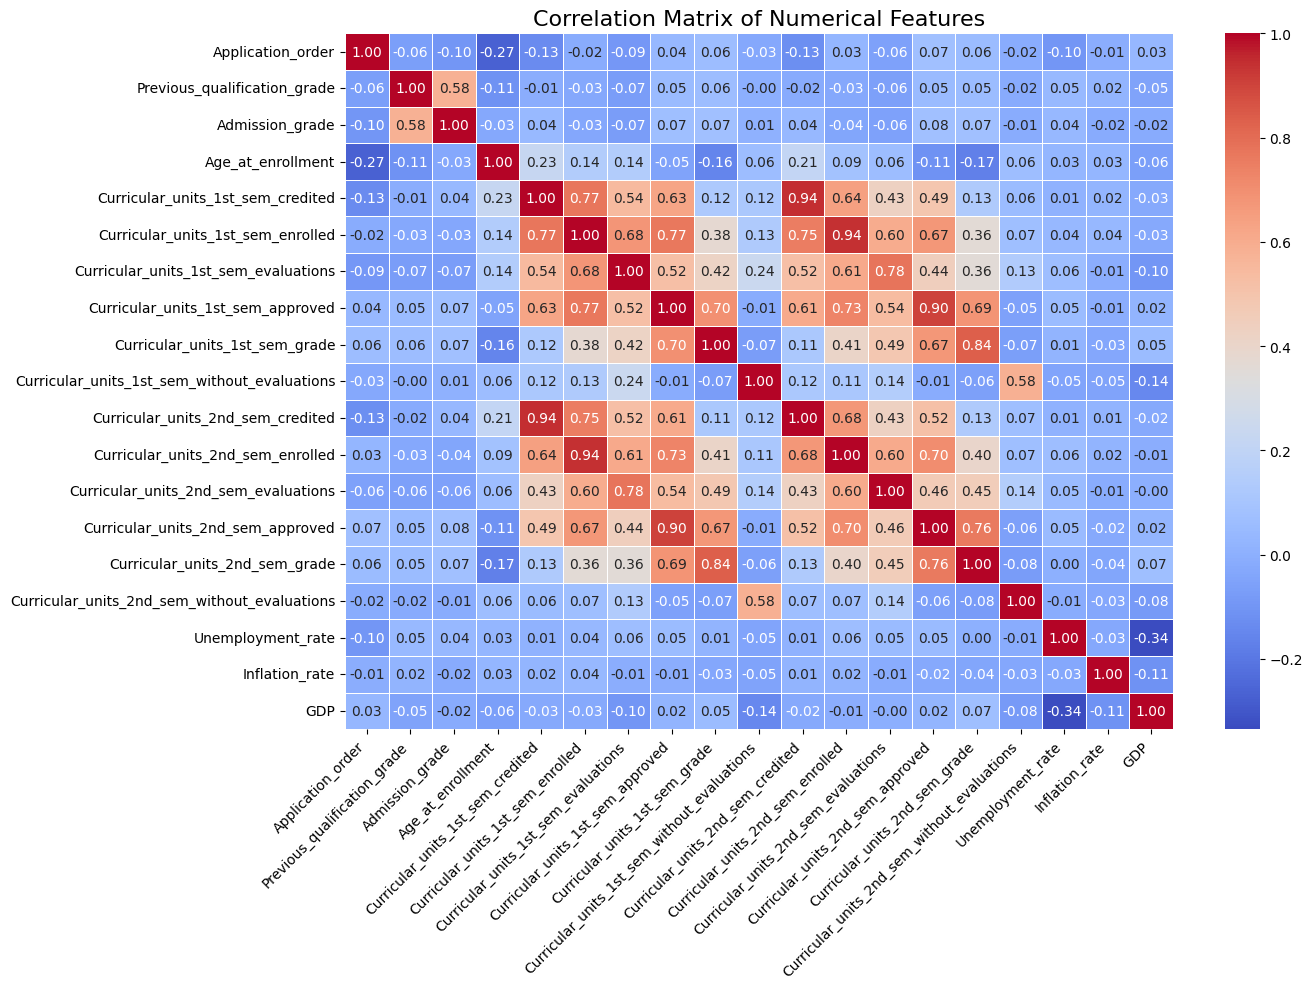

In [13]:
numerical_features = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP'
]

# Hitung korelasi antar fitur numerik
corr_matrix = df[numerical_features].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Preprocessing

## Train-test Split

In [14]:
train_df, test_df = train_test_split(new_df, test_size=0.1, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(3981, 37)
(443, 37)


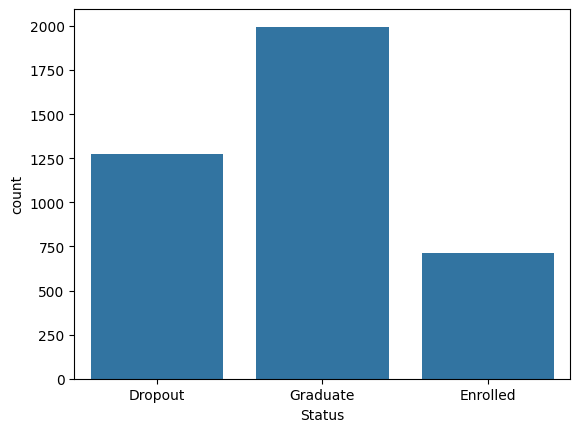

In [15]:
sns.countplot(data=train_df, x="Status")
plt.show()

In [16]:
train_df.Status.value_counts()

,count
Status,
Graduate,1996
Dropout,1274
Enrolled,711


## Oversampling

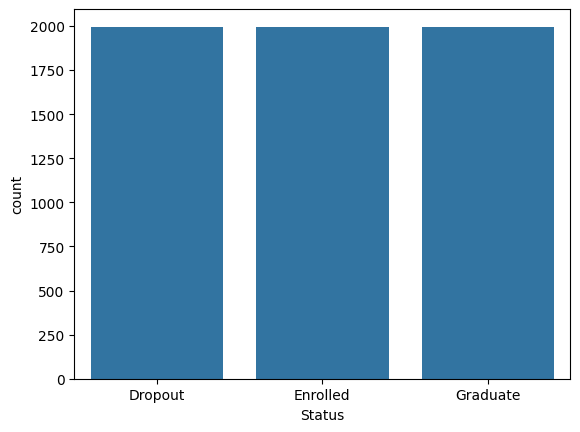

In [17]:
df_majority_1 = train_df[train_df.Status == "Graduate"]
df_majority_2 = train_df[train_df.Status == "Dropout"]
df_minority = train_df[train_df.Status == "Enrolled"]

df_majority_2_undersampled = resample(df_majority_2, n_samples=1996, random_state=42)
df_minority_undersampled = resample(df_minority, n_samples=1996, random_state=42)

oversampled_train_df = pd.concat([df_majority_1, df_majority_2_undersampled]).reset_index(drop=True)
oversampled_train_df = pd.concat([oversampled_train_df, df_minority_undersampled]).reset_index(drop=True)
oversampled_train_df = shuffle(oversampled_train_df, random_state=42)
oversampled_train_df.reset_index(drop=True, inplace=True)

sns.countplot(data=oversampled_train_df, x="Status")
plt.show()

In [18]:
X_train = oversampled_train_df.drop(columns="Status", axis=1)
y_train = oversampled_train_df["Status"]

X_test = test_df.drop(columns="Status", axis=1)
y_test = test_df["Status"]

## Encoding dan Scalling

In [19]:
def scaling(features, df, df_test=None):
    os.makedirs('model',exist_ok=True)
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    os.makedirs('model', exist_ok=True)
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            combined = pd.concat([df[feature], df_test[feature]], axis=0)
            encoder.fit(combined)
            df[feature] = encoder.transform(df[feature])
            df_test[feature] = encoder.transform(df_test[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df[feature] = encoder.transform(df[feature])
            joblib.dump(encoder, f"model/encoder_{feature}.joblib")
        return df

In [20]:
numerical_columns = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP',
]

categorical_columns = [
    "Marital_status",
    "Application_mode",
    'Application_order',
    "Course",
    "Daytime_evening_attendance",
    "Previous_qualification",
    "Nacionality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International",
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [21]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

In [22]:
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

## PCA (Principal Component Analysis)

In [23]:
pca_numerical_columns_1 = [
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_1st_sem_without_evaluations',
    'Curricular_units_2nd_sem_credited',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_2nd_sem_without_evaluations',
]

pca_numerical_columns_2 = [
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Unemployment_rate',
    'Inflation_rate',
    'GDP',
]

In [24]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

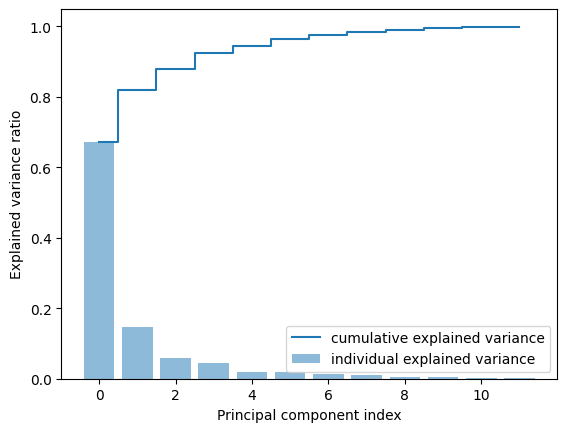

In [25]:
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [26]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Age_at_enrollment,International,Unemployment_rate,Inflation_rate,GDP,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0,7,1,5,1,0,0.273684,0,12,24,...,0.088889,0,0.000000,0.755556,0.578600,-0.273784,-0.016033,-0.370279,0.411644,0.042033
1,0,0,1,15,1,0,0.326316,0,2,0,...,0.022222,0,0.732558,0.111111,0.640687,0.184140,0.015081,-0.051545,0.096760,-0.074131
2,1,14,1,16,0,13,0.473684,0,20,24,...,0.533333,0,0.209302,0.000000,0.124174,0.203316,0.068732,-0.040567,-0.009681,0.071569
3,0,0,1,13,1,0,0.431579,0,12,0,...,0.022222,0,0.406977,0.311111,0.803170,0.290560,-0.069967,0.022940,0.099869,0.000023
4,1,11,1,9,1,0,0.263158,0,20,24,...,0.511111,0,0.151163,0.488889,1.000000,0.174230,-0.082969,-0.003269,0.025456,0.007829


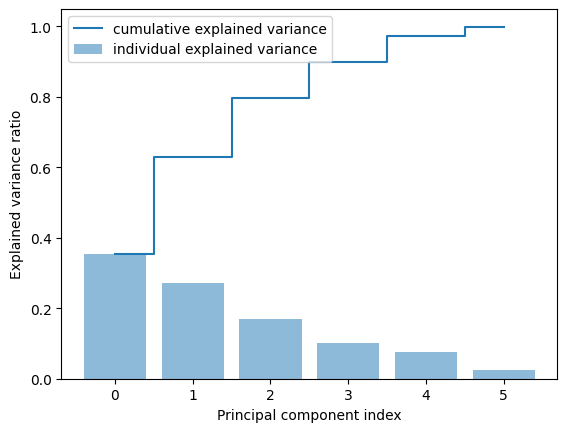

In [27]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [28]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,...,Gender,Scholarship_holder,International,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0,7,1,5,1,0,0,12,24,1,...,0,0,0,-0.273784,-0.016033,-0.370279,0.411644,0.042033,-0.304716,0.421951
1,0,0,1,15,1,0,0,2,0,2,...,0,0,0,0.184140,0.015081,-0.051545,0.096760,-0.074131,0.065041,-0.414529
2,1,14,1,16,0,13,0,20,24,9,...,0,0,0,0.203316,0.068732,-0.040567,-0.009681,0.071569,0.056102,-0.308150
3,0,0,1,13,1,0,0,12,0,9,...,0,1,0,0.290560,-0.069967,0.022940,0.099869,0.000023,-0.241189,-0.143979
4,1,11,1,9,1,0,0,20,24,7,...,1,1,0,0.174230,-0.082969,-0.003269,0.025456,0.007829,-0.516319,0.093006


In [29]:
princ_comp_1_test = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1_test, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

princ_comp_2_test = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2_test, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)

# Modelling

### GridSearch

In [30]:
param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

In [ ]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [ ]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


### Decision Tree

In [31]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='gini',
    max_depth=8,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest

In [ ]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = GridSearchCV(estimator=rdf_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


In [32]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

### GBoost

In [ ]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = GridSearchCV(estimator=gboost_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [5, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [ ]:
print("best parameters: ", CV_gboost.best_params_)

best parameters:  {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 300}


In [33]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='log2',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']

# Evaluation

In [34]:
def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels=['Graduate', 'Dropout', 'Enrolled']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df

In [35]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

              precision    recall  f1-score   support

     Dropout       0.80      0.58      0.67       147
    Enrolled       0.35      0.58      0.43        83
    Graduate       0.81      0.76      0.78       213

    accuracy                           0.66       443
   macro avg       0.65      0.64      0.63       443
weighted avg       0.72      0.66      0.68       443



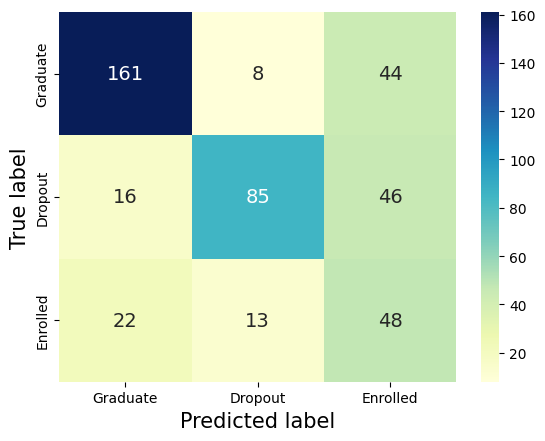

,Graduate,Dropout,Enrolled
Graduate,161,8,44
Dropout,16,85,46
Enrolled,22,13,48


In [36]:
evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80       147
    Enrolled       0.46      0.65      0.54        83
    Graduate       0.83      0.79      0.81       213

    accuracy                           0.74       443
   macro avg       0.72      0.72      0.72       443
weighted avg       0.78      0.74      0.76       443



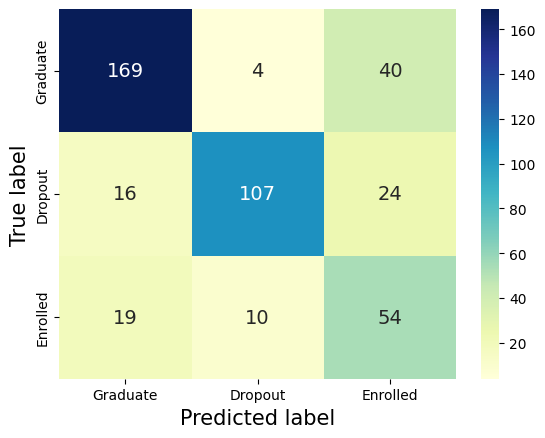

,Graduate,Dropout,Enrolled
Graduate,169,4,40
Dropout,16,107,24
Enrolled,19,10,54


In [37]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

              precision    recall  f1-score   support

     Dropout       0.83      0.78      0.80       147
    Enrolled       0.54      0.40      0.46        83
    Graduate       0.79      0.91      0.84       213

    accuracy                           0.77       443
   macro avg       0.72      0.69      0.70       443
weighted avg       0.76      0.77      0.76       443



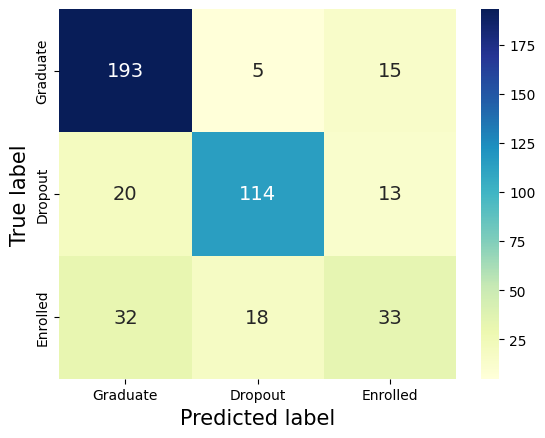

,Graduate,Dropout,Enrolled
Graduate,193,5,15
Dropout,20,114,13
Enrolled,32,18,33


In [38]:
y_pred_test = gboost_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

evaluating(y_pred=y_pred_test, y_true=y_test)

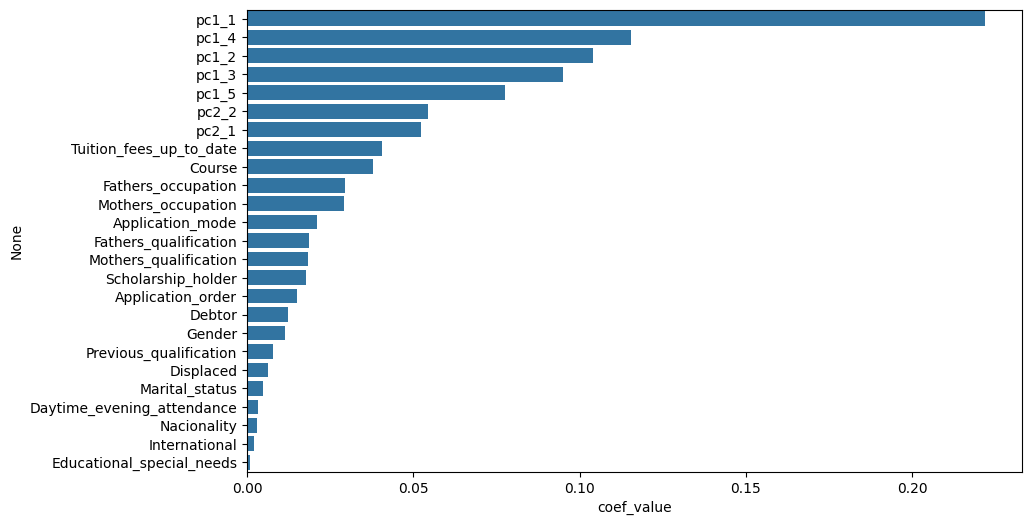

,coef_value
pc1_1,0.221970
pc1_4,0.115438
pc1_2,0.103921
pc1_3,0.095000
pc1_5,0.077617
pc2_2,0.054329
pc2_1,0.052234
Tuition_fees_up_to_date,0.040480
Course,0.037924
Fathers_occupation,0.029454


In [42]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

plot_feature_importances(gboost_model.feature_importances_, train_pca_df.columns)

In [43]:
!zip -r /content/file.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/scaler_Previous_qualification_grade.joblib (deflated 42%)
  adding: content/model/scaler_Admission_grade.joblib (deflated 42%)
  adding: content/model/encoder_Application_order.joblib (deflated 31%)
  adding: content/model/scaler_Curricular_units_1st_sem_enrolled.joblib (deflated 43%)
  adding: content/model/pca_2.joblib (deflated 34%)
  adding: content/model/encoder_Marital_status.joblib (deflated 29%)
  adding: content/model/scaler_Curricular_units_2nd_sem_evaluations.joblib (deflated 43%)
  adding: content/model/encoder_Scholarship_holder.joblib (deflated 25%)
  adding: content/model/gboost_model.joblib (deflated 70%)
  adding: content/model/encoder_Tuition_fees_up_to_date.joblib (deflated 25%)
  adding: content/model/scaler_Curricular_units_1st_sem_approved.joblib (deflated 43%)
  adding: content/model/rdf_model.joblib (deflated 72%)
  adding: content/model/encoder_Debtor.joblib (deflated 25%)
  adding: content/model/scal

In [44]:
!pip install session-info

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.5 MB/s eta 0:00:00


In [45]:
import session_info
session_info.show()